In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow import keras

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns




In [3]:
df = pd.read_csv(r'D:\batch -3\Machine learning project\Project 25 Hepatitis C Prediction\HepatitisCdata.csv')
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [4]:
df.shape

(615, 14)

In [5]:
df.tail()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,615,3=Cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


In [6]:
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [8]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [9]:
df=df.dropna()

In [10]:
df.isnull().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [11]:
x = df.drop(columns=['Category', 'Unnamed: 0', 'Sex'])
y = df['Category']

In [12]:
print(x)

     Age   ALB    ALP   ALT    AST   BIL    CHE  CHOL   CREA    GGT  PROT
0     32  38.5   52.5   7.7   22.1   7.5   6.93  3.23  106.0   12.1  69.0
1     32  38.5   70.3  18.0   24.7   3.9  11.17  4.80   74.0   15.6  76.5
2     32  46.9   74.7  36.2   52.6   6.1   8.84  5.20   86.0   33.2  79.3
3     32  43.2   52.0  30.6   22.6  18.9   7.33  4.74   80.0   33.8  75.7
4     32  39.2   74.1  32.6   24.8   9.6   9.15  4.32   76.0   29.9  68.7
..   ...   ...    ...   ...    ...   ...    ...   ...    ...    ...   ...
608   58  34.0   46.4  15.0  150.0   8.0   6.26  3.98   56.0   49.7  80.6
609   59  39.0   51.3  19.6  285.8  40.0   5.77  4.51  136.1  101.1  70.5
610   62  32.0  416.6   5.9  110.3  50.0   5.57  6.30   55.7  650.9  68.5
611   64  24.0  102.8   2.9   44.4  20.0   1.54  3.02   63.0   35.9  71.3
612   64  29.0   87.3   3.5   99.0  48.0   1.66  3.63   66.7   64.2  82.0

[589 rows x 11 columns]


In [13]:
print(y)

0      0=Blood Donor
1      0=Blood Donor
2      0=Blood Donor
3      0=Blood Donor
4      0=Blood Donor
           ...      
608      3=Cirrhosis
609      3=Cirrhosis
610      3=Cirrhosis
611      3=Cirrhosis
612      3=Cirrhosis
Name: Category, Length: 589, dtype: object


In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [15]:
model = svm.SVC(kernel='linear')
model.fit(xtrain,ytrain)

SVC(kernel='linear')

In [16]:
y_pre = model.predict(xtest)

In [17]:
print("SVM Accuracy:", accuracy_score(ytest, y_pre ))

SVM Accuracy: 0.923728813559322


In [18]:
logs = LogisticRegression()
logs.fit(xtrain,ytrain)
y_pre = logs.predict(xtest)
print("Logistic Accuracy:", accuracy_score(ytest, y_pre ))

Logistic Accuracy: 0.923728813559322


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)
knn_pred = knn.predict(xtest)
print("KNN Accuracy:", accuracy_score(ytest, knn_pred))

KNN Accuracy: 0.9067796610169492


In [20]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
dt_pred = dt.predict(xtest)
print("Decision Tree Accuracy:", accuracy_score(dt_pred,ytest ))

Decision Tree Accuracy: 0.923728813559322


In [21]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(xtrain, ytrain)
rf_pred = rf.predict(xtest)
print("Random Forest Accuracy:", accuracy_score( rf_pred,ytest))

Random Forest Accuracy: 0.9322033898305084


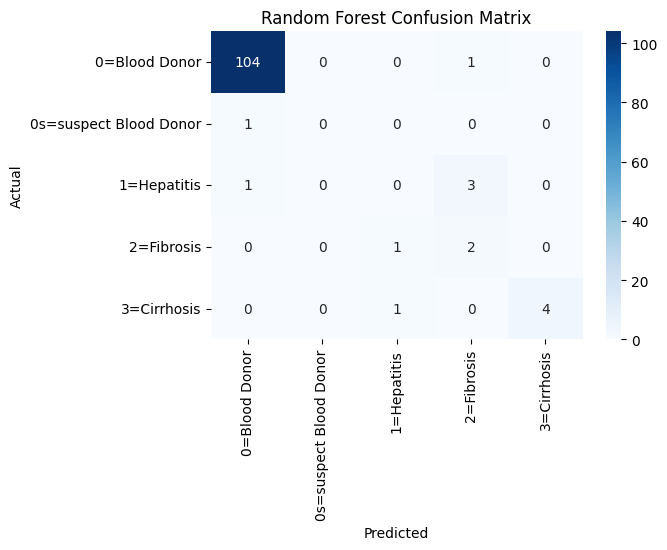

In [22]:
# Generate Confusion Matrix
cm = confusion_matrix(ytest, rf_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(ytest), yticklabels=np.unique(ytest))
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=42)
model.fit(xtrain, ytrain)
xtest_prediction = model.predict(xtest)
test_data_accuracy = accuracy_score( xtest_prediction, ytest)

print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.923728813559322


In [24]:
from sklearn.naive_bayes import GaussianNB #Naive bayes

model = GaussianNB()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
test_data_accuracy = accuracy_score( y_pred, ytest)
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.923728813559322


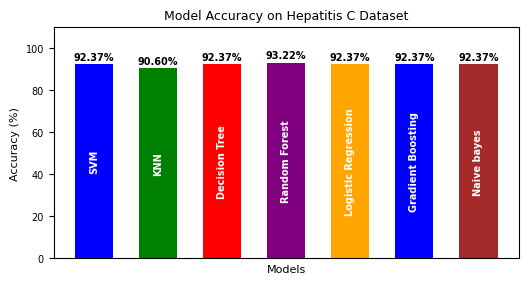

In [26]:
import matplotlib.pyplot as plt

# Data
models = ["SVM", "KNN", "Decision Tree", "Random Forest", "Logistic Regression", "Gradient Boosting","Naive bayes"]
accuracy = [92.37, 90.60, 92.37,93.22,92.37, 92.37,92.37]

# Plot
plt.figure(figsize=(6, 3))  # Small figure size
bars = plt.bar(models, accuracy, color=['blue', 'green', 'red', 'purple', 'orange', 'blue', 'brown'], width=0.6)

# Add model names inside the bars (centered)
for bar, model in zip(bars, models):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, model, ha='center', va='center',
             fontsize=7, fontweight='bold', color='white', rotation=90)  # Rotated for better fit

# Add accuracy values above the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f"{bar.get_height():.2f}%",
             ha='center', fontsize=7, fontweight='bold', color='black')

# Labels and title
plt.xlabel("Models", fontsize=8)
plt.ylabel("Accuracy (%)", fontsize=8)
plt.title("Model Accuracy on Hepatitis C Dataset", fontsize=9)
plt.xticks([])  # Remove x-axis labels since names are inside bars
plt.yticks(fontsize=7)
plt.ylim(0, 110)  # Set y-axis limit above 100

# Show plot
plt.show()